In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
import scipy.stats
import depth_tools as tool
%matplotlib inline

In [2]:
DIR = '../../data/'
BOARD = DIR + 'board/'
RENDER = DIR + 'render_wave1_300/'
OUT = 'check_shading/'
size = 120

In [3]:
shade_bA = cv2.imread(BOARD + 'shading/shading001.bmp', 0)
img_depth_bA = cv2.imread(BOARD + 'rec_ajusted/depth001.bmp', -1)
img_gt_bA = cv2.imread(BOARD + 'gt/gt001.bmp', -1)
p_shade_bA = shade_bA[120:120+size, 1000:1000+size]
p_img_depth_bA = img_depth_bA[120:120+size, 1000:1000+size, :]
p_img_gt_bA = img_gt_bA[120:120+size, 1000:1000+size, :]
depth_bA = tool.unpack_bmp_bgra_to_float(p_img_depth_bA)
gt_bA = tool.unpack_bmp_bgra_to_float(p_img_gt_bA)
s_shade_bA = p_shade_bA[size//2, :]
s_diff_bA = gt_bA[size//2, :] - depth_bA[size//2, :]

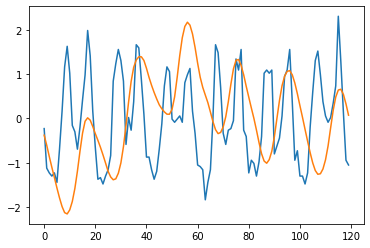

In [4]:
n_s_shade_bA = scipy.stats.zscore(s_shade_bA)
n_s_diff_bA = scipy.stats.zscore(s_diff_bA)
x = range(size)
plt.figure()
plt.plot(x, n_s_shade_bA)
plt.plot(x, n_s_diff_bA)
plt.show()

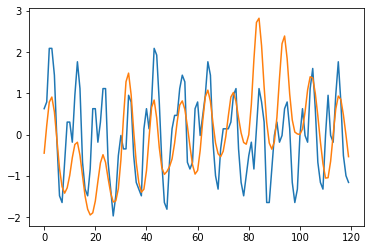

In [5]:
shade_bB = cv2.imread(BOARD + 'shading/shading040.bmp', 0)
img_depth_bB = cv2.imread(BOARD + 'rec_ajusted/depth040.bmp', -1)
img_gt_bB = cv2.imread(BOARD + 'gt/gt040.bmp', -1)
p_shade_bB = shade_bB[120:120+size, 1000:1000+size]
p_img_depth_bB = img_depth_bB[120:120+size, 1000:1000+size, :]
p_img_gt_bB = img_gt_bB[120:120+size, 1000:1000+size, :]
depth_bB = tool.unpack_bmp_bgra_to_float(p_img_depth_bB)
gt_bB = tool.unpack_bmp_bgra_to_float(p_img_gt_bB)
s_shade_bB = p_shade_bB[size//2, :]
s_diff_bB = gt_bB[size//2, :] - depth_bB[size//2, :]
n_s_shade_bB = scipy.stats.zscore(s_shade_bB)
n_s_diff_bB = scipy.stats.zscore(s_diff_bB)
plt.figure()
plt.plot(x, n_s_shade_bB)
plt.plot(x, n_s_diff_bB)
plt.show()

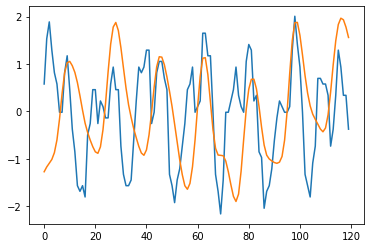

In [6]:
shade_bC = cv2.imread(BOARD + 'shading/shading048.bmp', 0)
img_depth_bC = cv2.imread(BOARD + 'rec_ajusted/depth048.bmp', -1)
img_gt_bC = cv2.imread(BOARD + 'gt/gt048.bmp', -1)
p_shade_bC = shade_bC[120:120+size, 1000:1000+size]
p_img_depth_bC = img_depth_bC[120:120+size, 1000:1000+size, :]
p_img_gt_bC = img_gt_bC[120:120+size, 1000:1000+size, :]
depth_bC = tool.unpack_bmp_bgra_to_float(p_img_depth_bC)
gt_bC = tool.unpack_bmp_bgra_to_float(p_img_gt_bC)
s_shade_bC = p_shade_bC[size//2, :]
s_diff_bC = gt_bC[size//2, :] - depth_bC[size//2, :]
n_s_shade_bC = scipy.stats.zscore(s_shade_bC)
n_s_diff_bC = scipy.stats.zscore(s_diff_bC)
plt.figure()
plt.plot(x, n_s_shade_bC)
plt.plot(x, n_s_diff_bC)
plt.show()

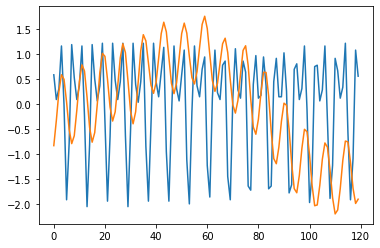

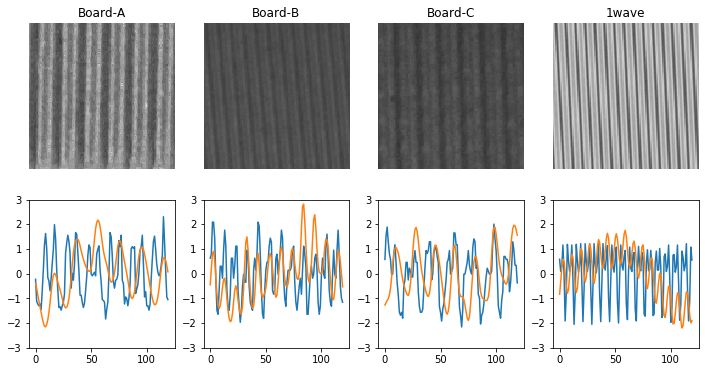

In [54]:
fig, ax = plt.subplots(2, 4, figsize=(12,6))

ax[0, 0].set_title('Board-A')
ax[0, 0].imshow(np.dstack([p_shade_bA, p_shade_bA, p_shade_bA]))
ax[0, 0].axis('off')
ax[1, 0].plot(x, n_s_shade_bA)
ax[1, 0].plot(x, n_s_diff_bA)
ax[1, 0].set_ylim(-3, 3)

ax[0, 1].set_title('Board-B')
ax[0, 1].imshow(np.dstack([p_shade_bB, p_shade_bB, p_shade_bB]))
ax[0, 1].axis('off')
ax[1, 1].plot(x, n_s_shade_bB)
ax[1, 1].plot(x, n_s_diff_bB)
ax[1, 1].set_ylim(-3, 3)

ax[0, 2].set_title('Board-C')
ax[0, 2].imshow(np.dstack([p_shade_bC, p_shade_bC, p_shade_bC]))
ax[0, 2].axis('off')
ax[1, 2].plot(x, n_s_shade_bC)
ax[1, 2].plot(x, n_s_diff_bC)
ax[1, 2].set_ylim(-3, 3)

ax[0, 3].set_title('1wave')
ax[0, 3].imshow(np.dstack([p_shade_R, p_shade_R, p_shade_R]))
ax[0, 3].axis('off')
ax[1, 3].plot(x, n_s_shade_R)
ax[1, 3].plot(x, n_s_diff_R)
ax[1, 3].set_ylim(-3, 3)

plt.savefig(OUT+'slice_compare.pdf')
plt.show()